![image.jpeg](PlayStore.jpeg)

## Analysis And Visualizations
**Remember the csv file you created in the last task ? Now it's time to use it for some analysis and visualizations**

**Note: each question will be answered into 2 parts first your analysis using pandas and then use visualizations to prove it**

### 11. Which app has the greatest number of reviews?

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/filteredplaystore.csv')

# Convert Reviews to numeric if not already
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# the app with the maximum number of reviews
most_reviewed_app = df.loc[df['Reviews'].idxmax()]

print("App with the most reviews:")
print(most_reviewed_app[['App', 'Reviews']])

App with the most reviews:
App        Facebook
Reviews    78158306
Name: 4324, dtype: object


<ipython-input-25-9c9dcced3565>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Reviews', y='App', data=top_10_reviews, palette='Blues_r')


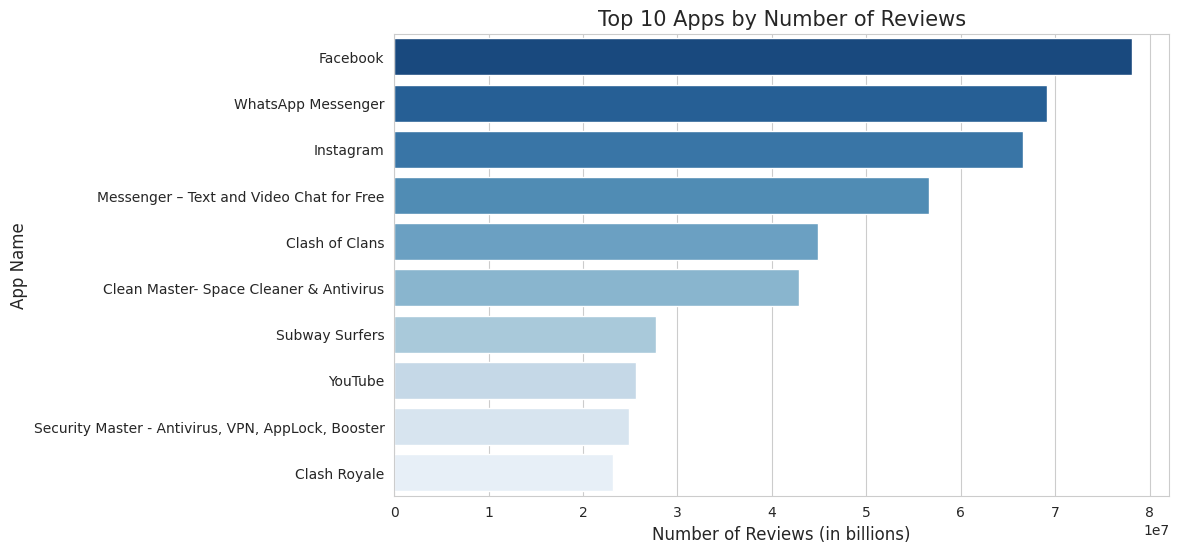

In [25]:
top_10_reviews = df.nlargest(10, 'Reviews')[['App', 'Reviews']]

plt.figure(figsize=(10, 6))
sns.barplot(x='Reviews', y='App', data=top_10_reviews, palette='Blues_r')
plt.title('Top 10 Apps by Number of Reviews', fontsize=15)
plt.xlabel('Number of Reviews (in billions)', fontsize=12)
plt.ylabel('App Name', fontsize=12)
plt.show()

### 12. What Category Has the Highest Number of Apps Uploaded to the Store?

Get the specific category that contains the most significant number of uploaded applications.

In [13]:
# Count apps per category
category_counts = df['Category'].value_counts()

# the top category
top_category = category_counts.idxmax()
top_count = category_counts.max()

print(f"Category with the most apps: '{top_category}'")
print(f"Number of apps: {top_count}")

Category with the most apps: 'Family'
Number of apps: 1870


<ipython-input-26-d82f9d5ff871>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


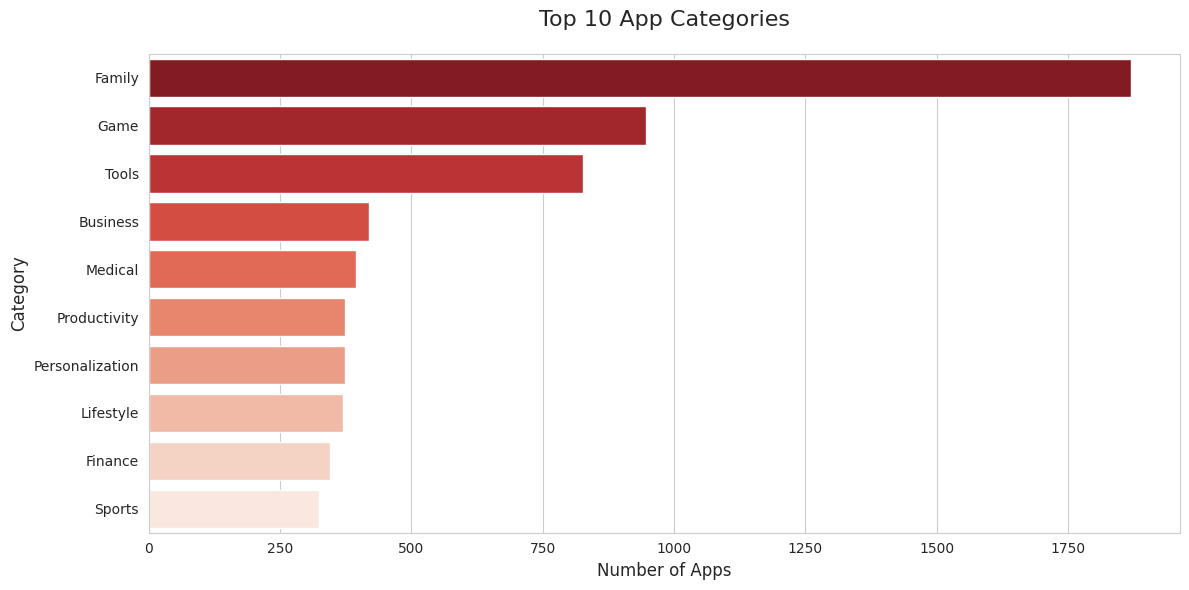

In [26]:
# top 10 categories
top_10_categories = category_counts.head(10)
sns.set_style("whitegrid")

#  bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_10_categories.values,
    y=top_10_categories.index,
    palette="Reds_r"
)
plt.title("Top 10 App Categories", fontsize=16, pad=20)
plt.xlabel("Number of Apps", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.tight_layout()
plt.show()

### 13. To Which Category Belongs the Most Expensive App?

In [24]:
# Find the most expensive app
most_expensive_app = df.loc[df['Price'].idxmax()]

print("Most Expensive App:")
print(f"App Name: {most_expensive_app['App']}")
print(f"Category: {most_expensive_app['Category']}")
print(f"Price: ${most_expensive_app['Price']:.2f}")

Most Expensive App:
App Name: I'm Rich - Trump Edition
Category: Lifestyle
Price: $400.00


<ipython-input-58-16ac72aa8744>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


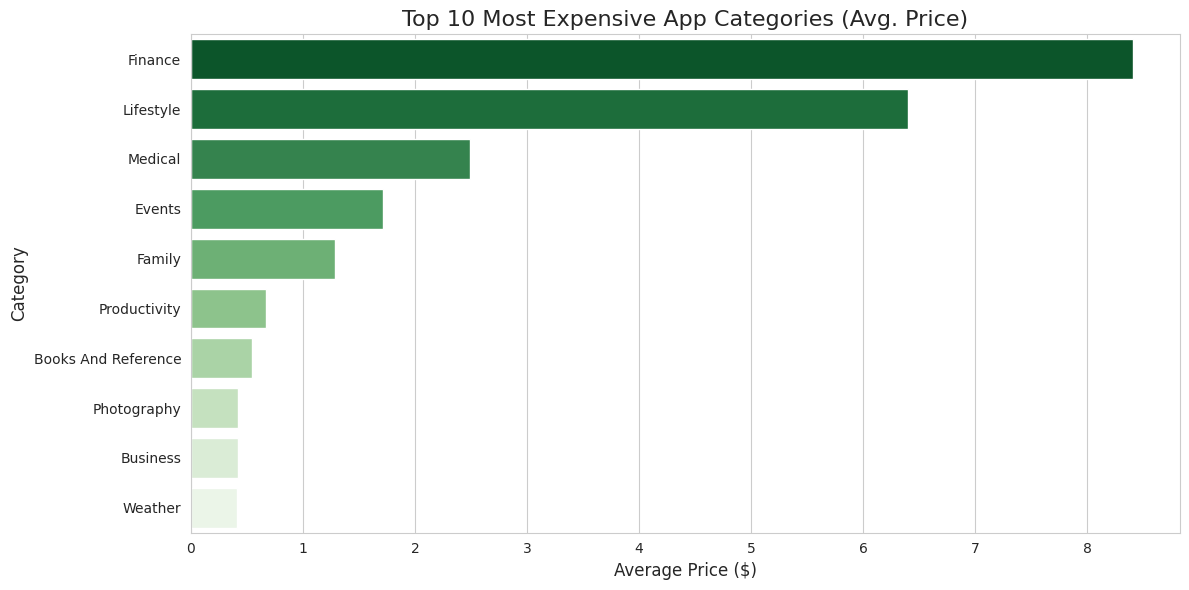

In [58]:
# Calculate average price per category
avg_price_per_category = df.groupby('Category')['Price'].mean().sort_values(ascending=False)

top_10_expensive_categories = avg_price_per_category.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_10_expensive_categories.values,
    y=top_10_expensive_categories.index,
    palette="Greens_r"
)

plt.title("Top 10 Most Expensive App Categories (Avg. Price)", fontsize=16)
plt.xlabel("Average Price ($)", fontsize=12)
plt.ylabel("Category", fontsize=12)

plt.tight_layout()
plt.show()

### 14. What's the Name of the Most Expensive Game?

Find the most expensive app in the Game category and enter its name.

In [43]:
# Filter only the apps in the Game category
games_df = df[df['Category'] == 'Game']

# Convert Price to numeric
games_df['Price'] = pd.to_numeric(games_df['Price'], errors='coerce')

most_expensive_game = games_df.loc[games_df['Price'].idxmax()]

print("Most expensive game:")
print(most_expensive_game[['App', 'Price']])


Most expensive game:
App      The World Ends With You
Price                      17.99
Name: 8410, dtype: object


<ipython-input-43-2e550a5b1f3c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df['Price'] = pd.to_numeric(games_df['Price'], errors='coerce')


<ipython-input-47-869aa90e91fd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price', y='App', data=top_10, palette='crest')


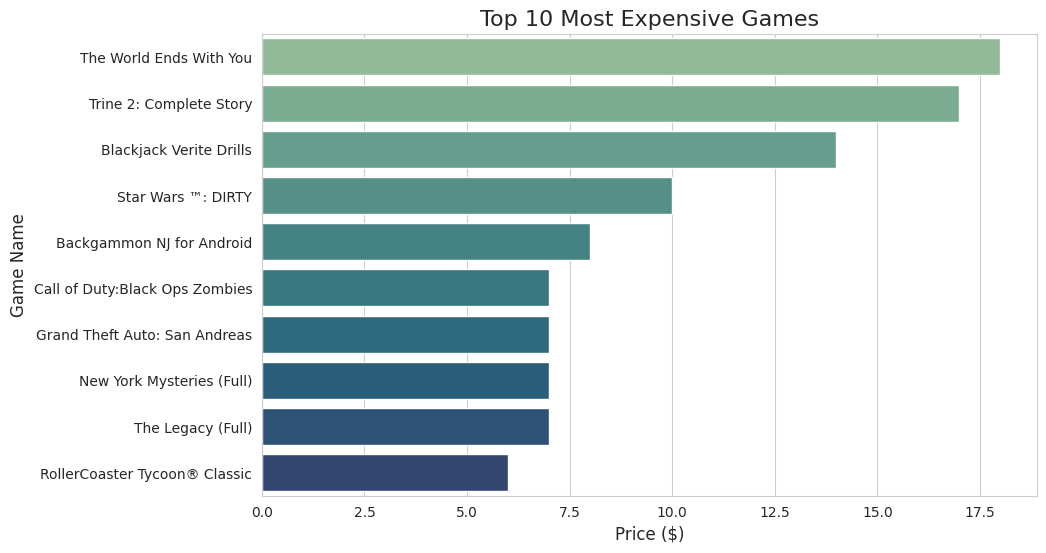

In [47]:
top_10 = games_df.nlargest(10, 'Price')

plt.figure(figsize=(10,6))
sns.barplot(x='Price', y='App', data=top_10, palette='crest')
plt.title('Top 10 Most Expensive Games', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Game Name', fontsize=12)
plt.show()

### 15. Which Is the Most Popular Finance App?

What app (from the Finance category) has the most installs?

In [52]:
# Filter the apps in the Finance category
finance_df = df[df['Category'] == 'Finance']

# Convert Installs to numeric
finance_df['Installs'] = pd.to_numeric(finance_df['Installs'], errors='coerce')

most_popular_finance_app = finance_df.loc[finance_df['Installs'].idxmax()]

print("Most popular finance app:")
print(most_popular_finance_app[['App', 'Installs']])


Most popular finance app:
App         Google Pay
Installs     100000000
Name: 4932, dtype: object


<ipython-input-52-ea44c6b13af5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finance_df['Installs'] = pd.to_numeric(finance_df['Installs'], errors='coerce')


<ipython-input-60-1f288246e6d6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


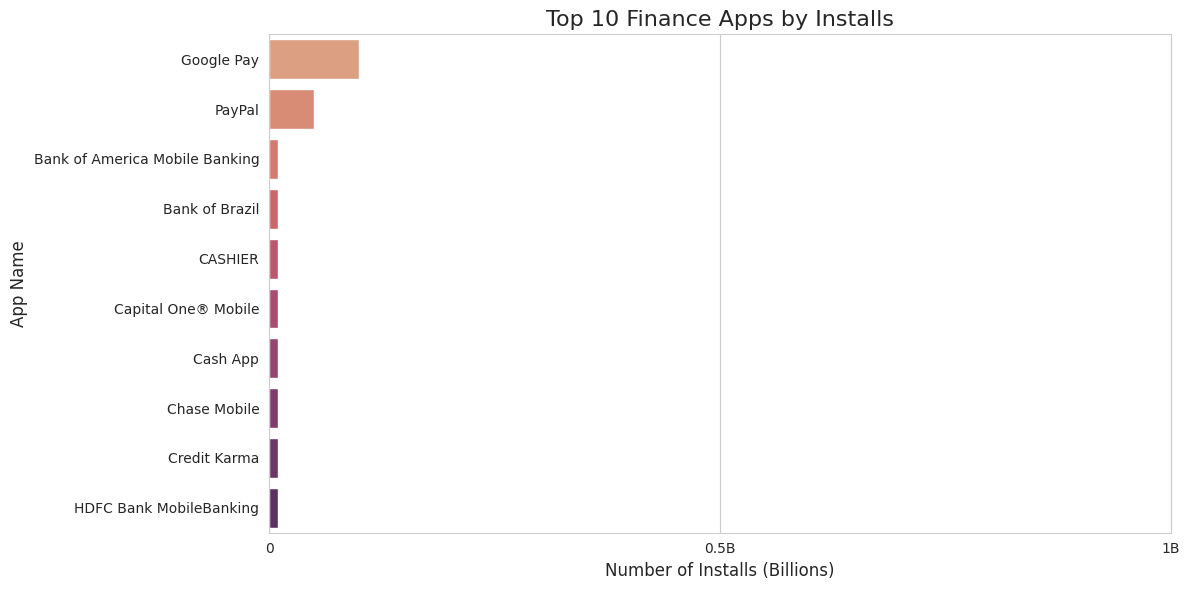

In [60]:
top_10_finance = finance_df.nlargest(10, 'Installs')[['App', 'Installs', 'Rating']]

plt.figure(figsize=(12, 6))
sns.barplot(
    x='Installs',
    y='App',
    data=top_10_finance,
    palette='flare'
)

plt.title('Top 10 Finance Apps by Installs', fontsize=16)
plt.xlabel('Number of Installs (Billions)', fontsize=12)
plt.ylabel('App Name', fontsize=12)
plt.xticks(ticks=[0, 500_000_000, 1_000_000_000], labels=['0', '0.5B', '1B'])

plt.tight_layout()
plt.show()

### 16. What Teen Game Has the Most Reviews?

What app from the Game category and catalogued as Teen in Content Rating has the most reviews?

In [62]:
# Filter for Game category and Teen content rating
teen_games = df[(df['Category'] == 'Game') & (df['Content Rating'] == 'Teen')]

# Convert Reviews to numeric
teen_games['Reviews'] = pd.to_numeric(teen_games['Reviews'], errors='coerce')

most_reviewed_teen_game = teen_games.loc[teen_games['Reviews'].idxmax()]

print("Most reviewed Teen-rated Game:")
print(most_reviewed_teen_game[['App', 'Reviews']])


Most reviewed Teen-rated Game:
App        Asphalt 8: Airborne
Reviews                8389714
Name: 832, dtype: object


<ipython-input-62-901c86a80f94>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teen_games['Reviews'] = pd.to_numeric(teen_games['Reviews'], errors='coerce')


<ipython-input-74-6b11210f4bb5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


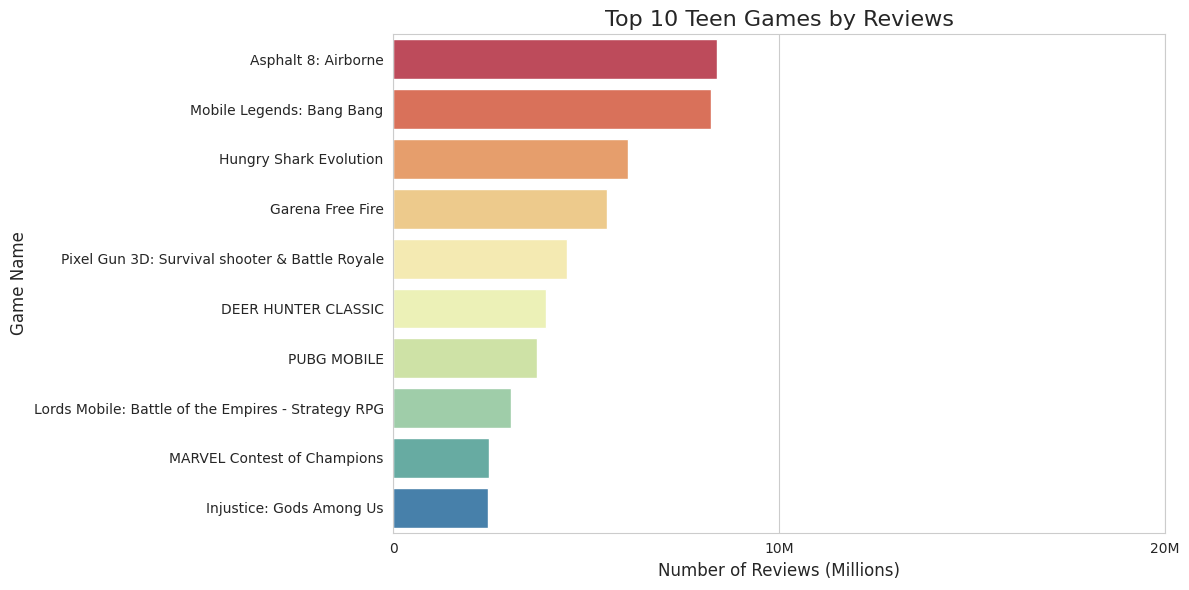

In [74]:
top_10_teen = teen_games.nlargest(10, 'Reviews')

plt.figure(figsize=(12,6))
sns.barplot(
    x='Reviews',
    y='App',
    data=top_10_teen,
    palette='Spectral'
)
plt.title('Top 10 Teen Games by Reviews', fontsize=16)
plt.xlabel('Number of Reviews (Millions)', fontsize=12)
plt.ylabel('Game Name', fontsize=12)
plt.xticks(ticks=[0, 10_000_000, 20_000_000],
           labels=['0', '10M', '20M'])

plt.tight_layout()
plt.show()

### 17. Which Is the Free Game with the Most Reviews?

 Get the name of the free game app with the most reviews.

In [101]:
# Filter only free games
free_games = df[(df['Category'] == 'Game') & (df['Type'] == 'Free')].copy()

# Convert Reviews to numeric and drop rows with NaN reviews
free_games['Reviews'] = pd.to_numeric(free_games['Reviews'], errors='coerce')
free_games = free_games.dropna(subset=['Reviews'])

# Check if there are still rows left
if not free_games.empty:

    most_reviewed_free_game = free_games.loc[free_games['Reviews'].idxmax()]
    print("Most reviewed free game:")
    print(most_reviewed_free_game[['App', 'Reviews']])
else:
    print("No free games in dataset :( ")


No free games in dataset :( 


### 18. How many Tb (tebibytes) were transferred (overall) for the most popular Lifestyle app?

This app produced the greatest amount of bytes transfer. Enter your answer in Tebibytes as a whole number (rounding down to the nearest integer). Example, if you find the total transfer to be 780.9581 Tb, just enter 780.

- Find the total size by multiplying size of the app with total installs and convert the result into TB.

In [100]:
lifestyle_df = df[df['Category'].str.upper() == 'LIFESTYLE'].copy()

if not lifestyle_df.empty:
    # Convert installs to string, remove + and , characters, handle special cases, and convert to integer
    lifestyle_df['Installs'] = (
        lifestyle_df['Installs']
        .astype(str)
        .str.replace('[+,]', '', regex=True)
        .replace('Varies with device', '0')
        .fillna('0')
        .astype(int)
    )

    def convert_to_mb(size):
        if isinstance(size, str):
            size = size.strip()
            if 'M' in size:
                return float(size.replace('M', ''))
            elif 'k' in size:
                return float(size.replace('k', '')) / 1024
            elif 'G' in size:
                return float(size.replace('G', '')) * 1024
        return 10

    lifestyle_df['Size_MB'] = lifestyle_df['Size'].apply(convert_to_mb)

    most_popular = lifestyle_df.loc[lifestyle_df['Installs'].idxmax()]

    # Convert MB to bytes (1024*1024) then to TiB (1024^4)
    total_bytes = most_popular['Size_MB'] * most_popular['Installs'] * 1024 * 1024
    total_tib = int(total_bytes / (1024 ** 4))  # Convert to integer TiB

    print(f"Most Popular Lifestyle App: {most_popular['App']}")
    print(f"App Size: {most_popular['Size_MB']:.2f} MB")
    print(f"Total Installs: {most_popular['Installs']:,}")
    print(f"Total Data Transferred: {total_tib} TiB")

else:
    print("No LIFESTYLE apps found in the dataset!")
    print("Available categories:", df['Category'].unique())

Most Popular Lifestyle App: Tinder
App Size: 10.00 MB
Total Installs: 100,000,000
Total Data Transferred: 953 TiB
